# import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('global-power-plant-database')

In [3]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
data.shape

(907, 27)

# cheking for null value

<AxesSubplot:>

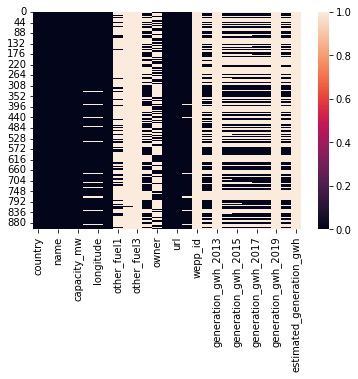

In [6]:
sns.heatmap(data.isnull())

we observed that dataset has null values

In [7]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [8]:
data.drop('country',axis=1,inplace=True)
data.drop('country_long',axis=1,inplace=True)
data.drop('gppd_idnr',axis=1,inplace=True)
data.drop('estimated_generation_gwh',axis=1,inplace=True)
data.drop('wepp_id',axis=1,inplace=True)
data.drop('other_fuel3',axis=1,inplace=True)
data.drop('generation_gwh_2019',axis=1,inplace=True)
data.drop('generation_gwh_2013',axis=1,inplace=True)
data.drop('year_of_capacity_data',axis=1,inplace=True)
data.drop('url',axis=1,inplace=True)

In [9]:
data.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,NaN,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,NaN,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


filling the missing values with mean and mode

In [10]:
data.isnull().sum()

name                        0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
other_fuel2               906
commissioning_year        380
owner                     565
source                      0
geolocation_source         19
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [11]:
data['latitude'].fillna(data['latitude'].mean(),inplace=True)
data['longitude'].fillna(data['longitude'].mean(),inplace=True)
data['commissioning_year'].fillna(data['commissioning_year'].mean(),inplace=True)
data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean(),inplace=True)
data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean(),inplace=True)
data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean(),inplace=True)
data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean(),inplace=True)
data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].mean(),inplace=True)


In [12]:
data['other_fuel1'].fillna(data['other_fuel1'].mode()[0],inplace=True)
data['other_fuel2'].fillna(data['other_fuel2'].mode()[0],inplace=True)
data['geolocation_source'].fillna(data['geolocation_source'].mode()[0],inplace=True)
data['generation_data_source'].fillna(data['generation_data_source'].mode()[0],inplace=True)
data['owner'].fillna(data['owner'].mode()[0],inplace=True)
data['geolocation_source'].fillna(data['geolocation_source'].mode()[0],inplace=True)


<AxesSubplot:>

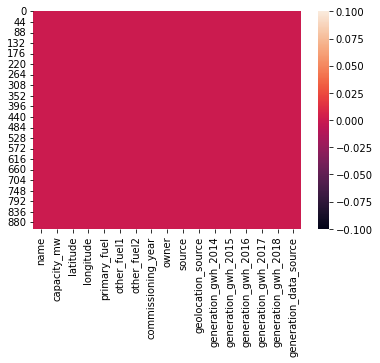

In [13]:
sns.heatmap(data.isnull())

In [14]:
data.isnull().sum()

name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [15]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


# checking for correlation

In [16]:
data.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,0.274292,0.694350,0.711190,0.742221,0.757585,0.773456
latitude,0.050984,1.000000,0.036362,0.102069,0.044321,0.036398,0.031256,0.031212,0.031326
longitude,0.195882,0.036362,1.000000,0.092331,0.011472,0.018818,0.039209,0.039675,0.037780
commissioning_year,0.274292,0.102069,0.092331,1.000000,0.133051,0.147338,0.170644,0.170863,0.174377
generation_gwh_2014,0.694350,0.044321,0.011472,0.133051,1.000000,0.953594,0.925874,0.891687,0.884956
generation_gwh_2015,0.711190,0.036398,0.018818,0.147338,0.953594,1.000000,0.968888,0.928242,0.923461
generation_gwh_2016,0.742221,0.031256,0.039209,0.170644,0.925874,0.968888,1.000000,0.964649,0.957159
generation_gwh_2017,0.757585,0.031212,0.039675,0.170863,0.891687,0.928242,0.964649,1.000000,0.982689
generation_gwh_2018,0.773456,0.031326,0.037780,0.174377,0.884956,0.923461,0.957159,0.982689,1.000000


<AxesSubplot:>

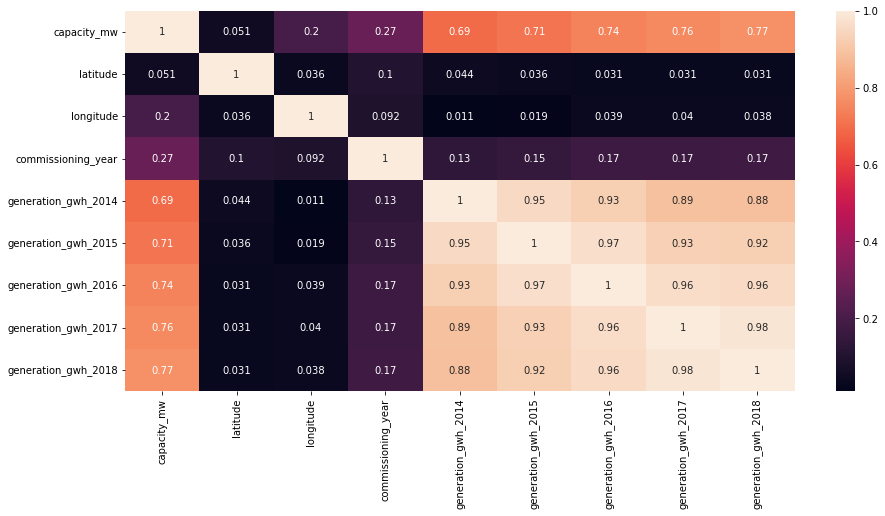

In [17]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

capacity_mw               AxesSubplot(0.125,0.125;0.0731132x0.755)
latitude               AxesSubplot(0.212736,0.125;0.0731132x0.755)
longitude              AxesSubplot(0.300472,0.125;0.0731132x0.755)
commissioning_year     AxesSubplot(0.388208,0.125;0.0731132x0.755)
generation_gwh_2014    AxesSubplot(0.475943,0.125;0.0731132x0.755)
generation_gwh_2015    AxesSubplot(0.563679,0.125;0.0731132x0.755)
generation_gwh_2016    AxesSubplot(0.651415,0.125;0.0731132x0.755)
generation_gwh_2017    AxesSubplot(0.739151,0.125;0.0731132x0.755)
generation_gwh_2018    AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

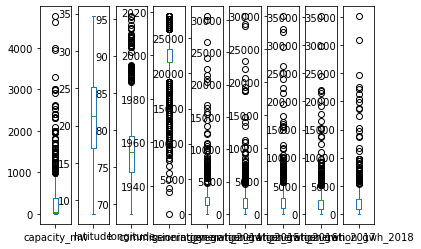

In [18]:
data.plot(subplots=True,kind='box')

# checking for skewness

In [19]:
data.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.399359
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

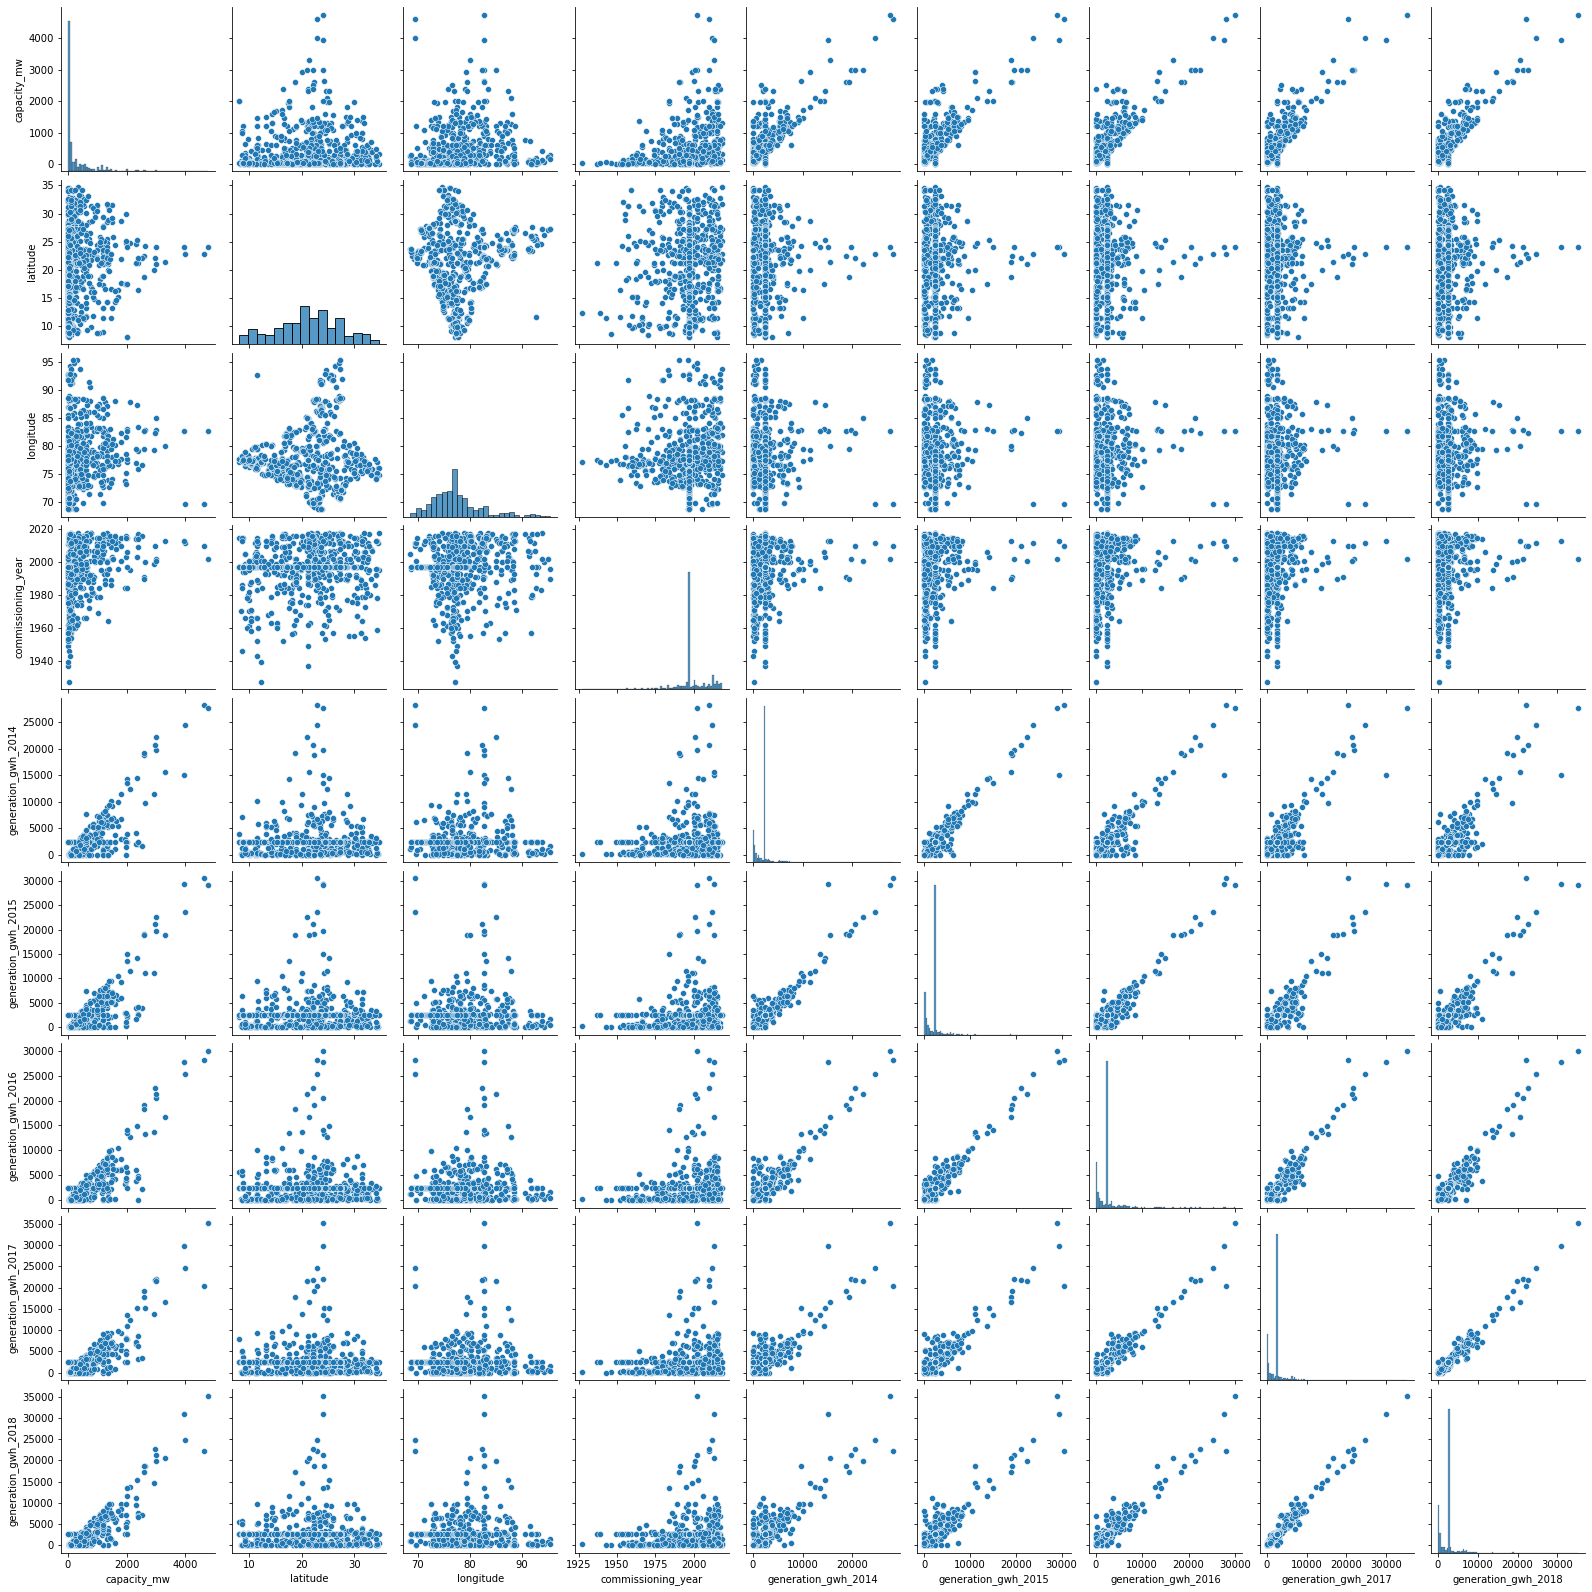

In [20]:
sns.pairplot(data)

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
data.head(1)

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority


In [23]:
data['name']=le.fit_transform(data['name'])
data['primary_fuel']=le.fit_transform(data['primary_fuel'])
data['other_fuel1']=le.fit_transform(data['other_fuel1'])
data['other_fuel2']=le.fit_transform(data['other_fuel2'])
data['owner']=le.fit_transform(data['owner'])
data['source']=le.fit_transform(data['source'])
data['geolocation_source']=le.fit_transform(data['geolocation_source'])
data['generation_data_source']=le.fit_transform(data['generation_data_source'])

In [24]:
data.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,2.5,28.1839,73.2407,6,2,0,2011.000000,229,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,1,98.0,24.7663,74.6090,1,2,0,1997.091082,258,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,2,39.2,21.9038,69.3732,7,2,0,1997.091082,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,3,135.0,23.8712,91.3602,2,2,0,2004.000000,5,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,4,1800.0,21.9603,82.4091,1,2,0,2015.000000,5,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0


# transforming dataset to remove skewness

In [25]:
x=data.drop(['primary_fuel'],axis=1)
x

,name,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,2.5,28.1839,73.2407,2,0,2011.000000,229,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,1,98.0,24.7663,74.6090,2,0,1997.091082,258,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,2,39.2,21.9038,69.3732,2,0,1997.091082,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,3,135.0,23.8712,91.3602,2,0,2004.000000,5,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,4,1800.0,21.9603,82.4091,2,0,2015.000000,5,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,1600.0,16.2949,77.3568,2,0,2016.000000,5,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,903,3.0,12.8932,78.1654,2,0,1997.091082,114,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
904,904,25.5,15.2758,75.5811,2,0,1997.091082,5,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
905,905,80.0,24.3500,73.7477,2,0,1997.091082,91,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0


In [26]:
y=data['primary_fuel']
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 907, dtype: int32

In [27]:
from sklearn.preprocessing import power_transform

In [28]:
x=power_transform(x,method='yeo-johnson')
x

array([[-2.16561515, -1.69576688,  1.1594364 , ...,  0.31292509,
         0.32193752,  0.        ],
       [-2.14663031,  0.19369368,  0.57903232, ...,  0.31292509,
         0.32193752,  0.        ],
       [-2.13033981, -0.2923371 ,  0.09991208, ...,  0.31292509,
         0.32193752,  0.        ],
       ...,
       [ 1.54842588, -0.52277344, -0.98053644, ...,  0.31292509,
         0.32193752,  0.        ],
       [ 1.55136078,  0.08691496,  0.50893808, ...,  0.31292509,
         0.32193752,  0.        ],
       [ 1.55429474, -0.75589054, -1.81390048, ...,  0.31292509,
         0.32193752,  0.        ]])

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [30]:
sc.fit_transform(x)
x

array([[-2.16561515, -1.69576688,  1.1594364 , ...,  0.31292509,
         0.32193752,  0.        ],
       [-2.14663031,  0.19369368,  0.57903232, ...,  0.31292509,
         0.32193752,  0.        ],
       [-2.13033981, -0.2923371 ,  0.09991208, ...,  0.31292509,
         0.32193752,  0.        ],
       ...,
       [ 1.54842588, -0.52277344, -0.98053644, ...,  0.31292509,
         0.32193752,  0.        ],
       [ 1.55136078,  0.08691496,  0.50893808, ...,  0.31292509,
         0.32193752,  0.        ],
       [ 1.55429474, -0.75589054, -1.81390048, ...,  0.31292509,
         0.32193752,  0.        ]])

# now splitting the dataset

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [33]:
print(y.shape, y_train.shape, y_test.shape)

(907,) (634,) (273,)


# model selection

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
lr=LogisticRegression()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [36]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.673992673992674
[[ 9  1  0  0  0  0  0  2]
 [ 3 53  1  8  0  0  0  7]
 [ 0  8  3  8  0  2  0  0]
 [ 0 20  2 61  1  0  0  4]
 [ 0  2  0  0  0  0  0  0]
 [ 1  1  0  2  0  0  0  1]
 [ 0  1  0  0  0  0 33  0]
 [ 0  0  0 14  0  0  0 25]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.62      0.74      0.67        72
           2       0.50      0.14      0.22        21
           3       0.66      0.69      0.67        88
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       1.00      0.97      0.99        34
           7       0.64      0.64      0.64        39

    accuracy                           0.67       273
   macro avg       0.51      0.49      0.49       273
weighted avg       0.66      0.67      0.66       273



In [37]:
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7765567765567766
[[ 8  3  0  0  0  1  0  0]
 [ 4 50  7  7  1  2  0  1]
 [ 0  7  7  4  0  3  0  0]
 [ 0 10  4 73  0  1  0  0]
 [ 0  0  0  1  1  0  0  0]
 [ 0  1  2  1  1  0  0  0]
 [ 0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0 39]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.70      0.69      0.70        72
           2       0.35      0.33      0.34        21
           3       0.85      0.83      0.84        88
           4       0.33      0.50      0.40         2
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00        34
           7       0.97      1.00      0.99        39

    accuracy                           0.78       273
   macro avg       0.61      0.63      0.62       273
weighted avg       0.78      0.78      0.78       273



In [38]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7435897435897436
[[ 8  2  0  0  0  0  0  2]
 [ 4 57  1  7  0  0  0  3]
 [ 0  6  2 12  0  1  0  0]
 [ 0 10  0 76  0  0  0  2]
 [ 0  2  0  0  0  0  0  0]
 [ 1  1  0  3  0  0  0  0]
 [ 0  1  0  0  0  0 33  0]
 [ 0  1  0 11  0  0  0 27]]
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.71      0.79      0.75        72
           2       0.67      0.10      0.17        21
           3       0.70      0.86      0.77        88
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       1.00      0.97      0.99        34
           7       0.79      0.69      0.74        39

    accuracy                           0.74       273
   macro avg       0.56      0.51      0.51       273
weighted avg       0.73      0.74      0.72       273



In [39]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7252747252747253
[[ 8  2  0  0  0  0  0  2]
 [ 5 55  3  8  0  0  0  1]
 [ 0  8  3  8  0  2  0  0]
 [ 0 16  6 63  0  0  0  3]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  1  3  0  0  0  0]
 [ 0  0  0  0  0  0 34  0]
 [ 2  0  0  2  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.53      0.67      0.59        12
           1       0.65      0.76      0.71        72
           2       0.23      0.14      0.18        21
           3       0.75      0.72      0.73        88
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00        34
           7       0.85      0.90      0.88        39

    accuracy                           0.73       273
   macro avg       0.50      0.52      0.51       273
weighted avg       0.70      0.73      0.71       273



# cross validation

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
for i in range(2,9):
    cv=cross_val_score(dtc,x,y,cv=i)
    print(dtc,cv.mean())

DecisionTreeClassifier() 0.6560205580029368
DecisionTreeClassifier() 0.7410005901252378
DecisionTreeClassifier() 0.7959972320767221
DecisionTreeClassifier() 0.7828122154089006
DecisionTreeClassifier() 0.8092613570349715
DecisionTreeClassifier() 0.8059033989266547
DecisionTreeClassifier() 0.805921052631579


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
param_alpha={'alpha':[.0001,.001,.01,.1,]}

In [43]:
rd=Ridge()

In [44]:
gd=GridSearchCV(estimator=rd,param_grid=param_alpha)

In [45]:
gd.fit(x,y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1]})

In [46]:
gd.best_params_

{'alpha': 0.1}

In [47]:
gd.best_score_

0.4304461978756794

In [49]:
pred=dtc.predict(x_test)
print('predicted Loan_Status:',pred)
print('actual Loan_Status',y_test)

predicted Loan_Status: [2 3 1 1 3 1 3 1 3 0 3 6 0 7 3 3 6 4 1 1 2 7 3 3 3 3 5 3 3 6 3 1 3 2 1 6 6
 7 3 0 2 1 7 1 1 7 3 1 1 1 1 3 3 3 3 7 3 1 7 2 1 7 1 3 1 3 1 6 6 3 3 1 3 7
 0 3 6 1 1 3 3 3 1 3 1 3 2 1 5 0 7 1 1 1 6 1 7 3 3 1 7 6 3 1 7 1 7 3 1 1 3
 3 1 1 2 6 3 7 3 0 6 2 6 1 7 6 3 7 3 1 7 3 3 3 7 7 2 3 1 3 5 1 6 6 7 7 7 3
 6 2 7 3 3 7 1 1 3 6 7 3 1 3 1 7 3 5 1 3 1 3 7 6 2 1 6 3 7 7 3 7 1 6 3 6 5
 2 1 3 3 7 3 1 3 2 3 3 3 3 1 3 7 7 3 1 3 1 4 7 1 3 1 7 6 6 1 3 7 6 3 0 1 1
 3 0 3 7 1 5 3 3 7 6 3 3 6 1 6 1 2 6 1 6 3 2 5 3 1 1 2 0 1 2 2 7 1 1 6 3 6
 1 2 6 3 0 2 4 0 1 3 3 0 1 6]
actual Loan_Status 870    1
741    3
487    1
785    1
548    3
      ..
14     3
170    3
321    0
800    3
115    6
Name: primary_fuel, Length: 273, dtype: int32


# checking for capacity_mw

In [50]:
x=data.drop(['capacity_mw'],axis=1)
x

,name,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,28.1839,73.2407,6,2,0,2011.000000,229,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,1,24.7663,74.6090,1,2,0,1997.091082,258,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,2,21.9038,69.3732,7,2,0,1997.091082,2,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,3,23.8712,91.3602,2,2,0,2004.000000,5,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,4,21.9603,82.4091,1,2,0,2015.000000,5,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,16.2949,77.3568,1,2,0,2016.000000,5,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,903,12.8932,78.1654,6,2,0,1997.091082,114,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
904,904,15.2758,75.5811,7,2,0,1997.091082,5,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
905,905,24.3500,73.7477,1,2,0,1997.091082,91,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0


In [51]:
y=data['capacity_mw']
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

# now spliting the dataset

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [54]:
print(y.shape, y_train.shape, y_test.shape)

(907,) (634,) (273,)


# model building

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [62]:
lr=LogisticRegression()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [64]:
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

ValueError: Unknown label type: 'continuous'